In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import os


In [2]:
DATA = os.getenv('DATA_DIR', '../data')

In [5]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

### Загрузка данных

In [3]:

df = pd.read_csv(os.path.join(DATA, "raw", "train_ver2.csv"))


/tmp/ipykernel_3329/795805494.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA, "raw", "train_ver2.csv"))


### Первичный анализ

In [6]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [17]:
print(f'Дубликатов: {df.duplicated().sum()}')

Дубликатов: 0


In [8]:
df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [26]:
# Проверка пропущенных значений
print(df.isnull().sum())


fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

Выделяются три переменные:

- **conyuemp**:  Вероятно, не так много клиентов являются супругами сотрудников банка.
- **ult_fec_cli_1t**: Эти данные представляют последнюю дату, когда клиент был премиальным. Это означает, что, вероятно, не так много клиентов переходят из категории премиальных в обычные.
- **renta**: Пропущена примерно в 1/5 записей.

Другие соответствующие выводы:

- Продукты **ind_nomina_ult1** и **ind_nom_pens_ult1** имеют отсутствующие значения. Это странно и требует исследования. Почему значения NaN вместо 0?
- получается значения первых двух полей есть только для 13647308-13622516 = 24792, 24792/13647308 < 1 %



In [5]:
for col in ['ult_fec_cli_1t', 'conyuemp']:
    del df[col]
df = df.dropna()

In [6]:
df['age'] = pd.to_numeric(df['age'])
df['antiguedad'] = pd.to_numeric(df['antiguedad'])

In [7]:
df.shape

(10795392, 46)

In [7]:
num_columns = ['age', 'antiguedad', "renta"]
boolean_vars = ['indfall', 'ind_actividad_cliente', 'ind_nuevo', 'indresi', 'indext', 'tipodom']
varchar_vars = ['cod_prov', 'nomprov', 'pais_residencia', 'ncodpers']
categorical_vars = ['segmento', 'ind_empleado', 'sexo', 'indrel', 
                    'indrel_1mes', 'tiprel_1mes', 'canal_entrada', 'nomprov']

In [28]:
df[num_columns].describe()

,age,antiguedad,renta
count,1.079539e+07,1.079539e+07,1.079539e+07
mean,4.079908e+01,8.059039e+01,1.342530e+05
std,1.720140e+01,1.776059e+03,2.308596e+05
min,2.000000e+00,-9.999990e+05,1.202730e+03
25%,2.500000e+01,2.600000e+01,6.871686e+04
50%,4.000000e+01,5.500000e+01,1.018585e+05
75%,5.100000e+01,1.410000e+02,1.559678e+05
max,1.270000e+02,2.560000e+02,2.889440e+07


In [8]:
df = df[df["antiguedad"]>0]

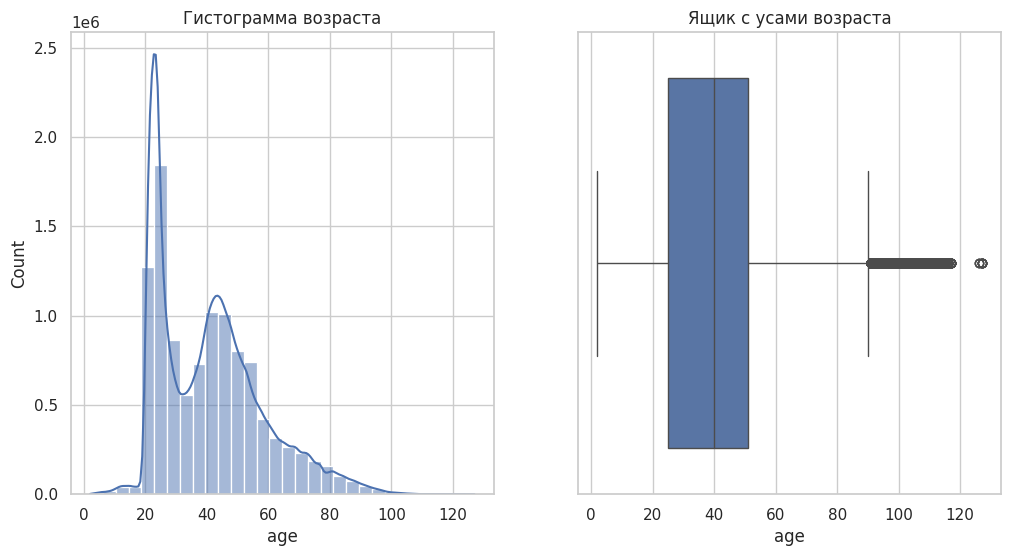

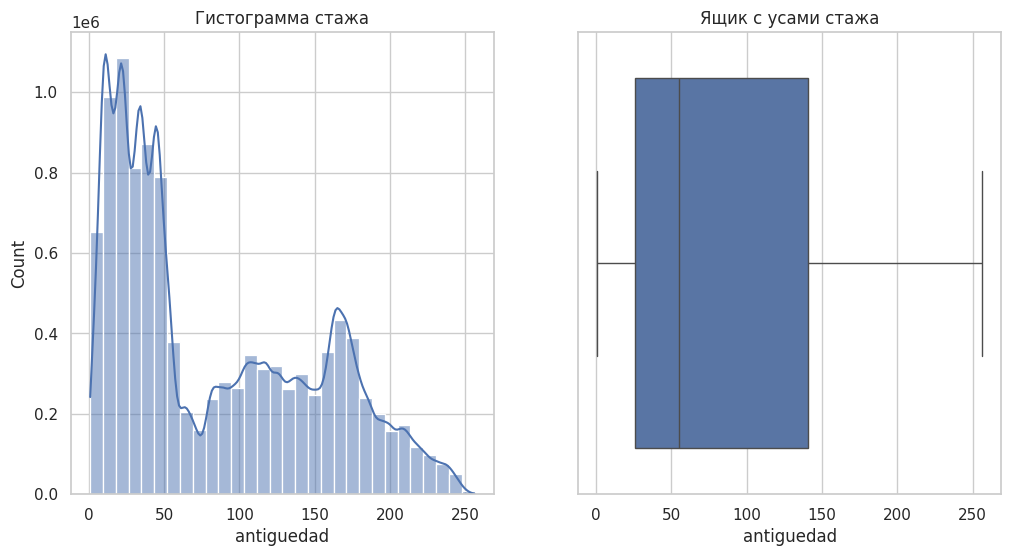

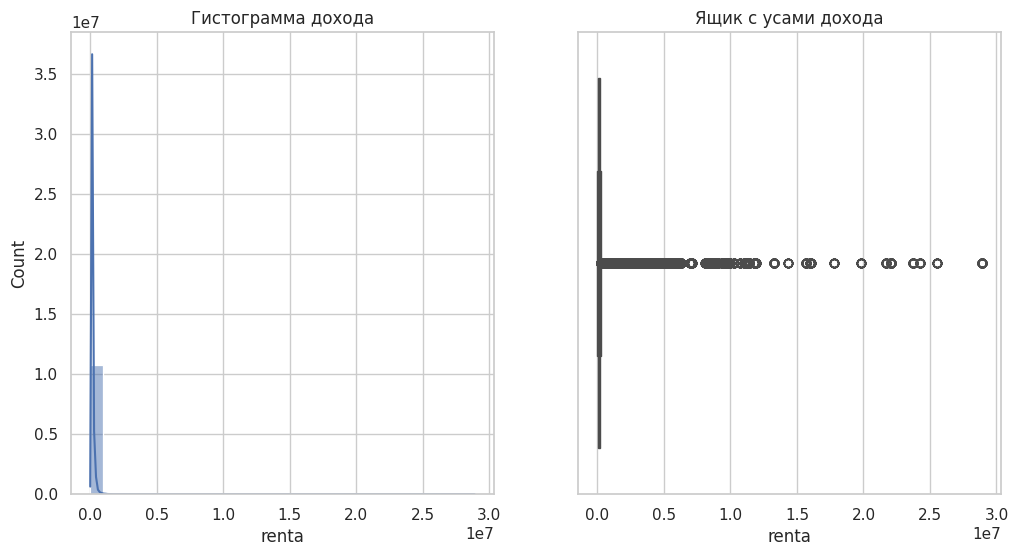

In [9]:
#### Построение гистограмм и ящиков с усами (box plots)

# Настройка стиля графиков
sns.set(style="whitegrid")

# Функция для построения гистограмм и ящиков с усами
def plot_distribution(df, column, title):
    plt.figure(figsize=(12, 6))
    
    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Гистограмма {title}')
    
    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Ящик с усами {title}')
    
    plt.show()

# Построение графиков для 'age'
plot_distribution(df, 'age', 'возраста')

# Построение графиков для 'antiguedad'
plot_distribution(df, 'antiguedad', 'стажа')

# Построение графиков для 'renta'
plot_distribution(df, 'renta', 'дохода')




/tmp/ipykernel_3843/1992149072.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


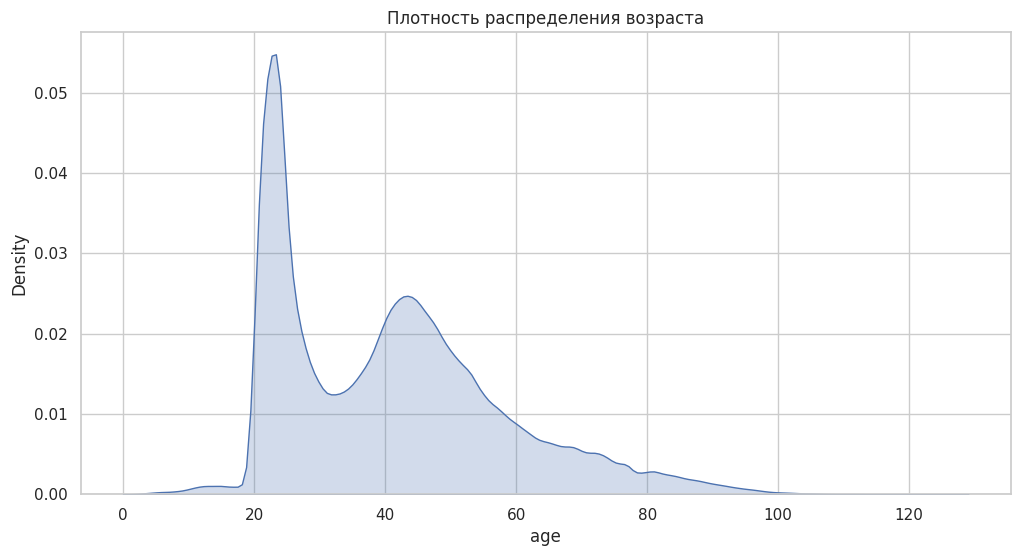

/tmp/ipykernel_3843/1992149072.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


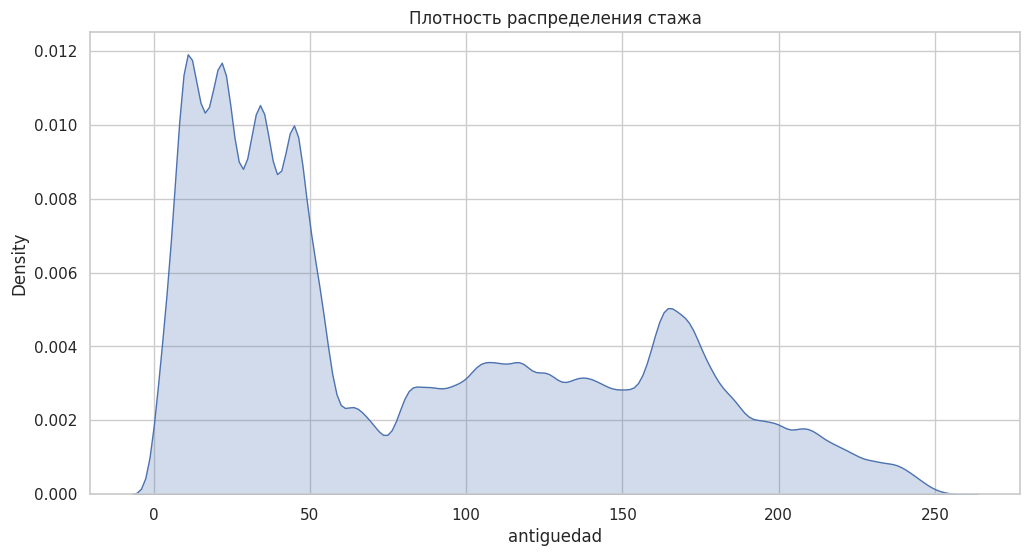

/tmp/ipykernel_3843/1992149072.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


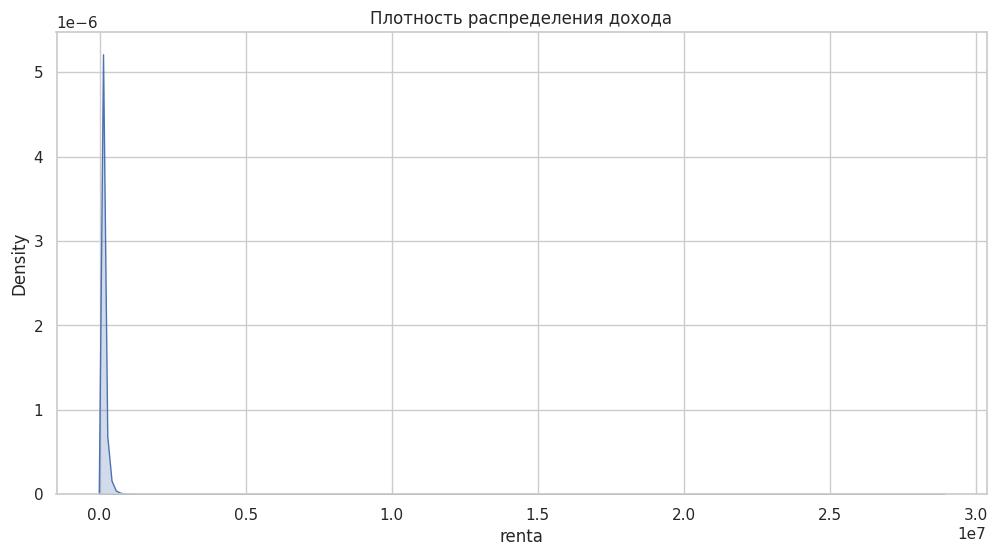

In [10]:
#### Построение плотностей распределения (density plots)

# Построение плотностей распределения
def plot_density(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Плотность распределения {title}')
    plt.show()

# Построение плотностей распределения для 'age'
plot_density(df, 'age', 'возраста')

# Построение плотностей распределения для 'antiguedad'
plot_density(df, 'antiguedad', 'стажа')

# Построение плотностей распределения для 'renta'
plot_density(df, 'renta', 'дохода')

In [64]:
df[num_columns].describe()

,age,antiguedad,renta
count,1.079533e+07,1.079533e+07,1.079533e+07
mean,4.079904e+01,8.374039e+01,1.342529e+05
std,1.720139e+01,6.618402e+01,2.308602e+05
min,2.000000e+00,1.000000e+00,1.202730e+03
25%,2.500000e+01,2.600000e+01,6.871686e+04
50%,4.000000e+01,5.500000e+01,1.018571e+05
75%,5.100000e+01,1.410000e+02,1.559675e+05
max,1.270000e+02,2.560000e+02,2.889440e+07


In [31]:
for var in boolean_vars:
    print(df[var].value_counts())

indfall
N    10768191
S       27201
Name: count, dtype: int64
ind_actividad_cliente
0.0    5717341
1.0    5078051
Name: count, dtype: int64
ind_nuevo
0.0    10537444
1.0      257948
Name: count, dtype: int64
indresi
S    10795309
N          83
Name: count, dtype: int64
indext
N    10330070
S      465322
Name: count, dtype: int64
tipodom
1.0    10795392
Name: count, dtype: int64


### Важные замечания:

1. **Все флаги основного адреса имеют значение True (tipodom)**. Этот столбец можно исключить.
2. **Большинство булевых переменных сильно смещены в сторону либо S (да), либо N (нет)**. Это относится к следующим переменным: ind_nuevo (новый клиент или нет), indresi (живет в стране или нет), indext (иностранец или нет). Эти признаки вряд ли будут полезны.
3. **Только 40% клиентов активны**. Я предполагаю, что неактивные клиенты не будут приобретать новые продукты, поэтому можно использовать простую эвристику в классификации на первом этапе. Также стоит включить в эту эвристику умерших клиентов, хотя умершие клиенты, вероятно, уже неактивны.
4. **Не все значения равны 0 или 1, некоторые помечены как S/N**. Эти значения можно преобразовать в 0 или 1.


In [33]:
for col in ['indresi', 'indext', 'indfall']:
    df[col] = df[col].map({'S': 1, 'N': 0})

In [39]:
columns_to_remove = ['tipodom']

In [37]:
for elem in varchar_vars:
    print(df[elem].value_counts()[:5])
    print()

cod_prov
28.0    3904715
8.0     1066011
46.0     548857
41.0     513509
15.0     310356
         ...   
16.0      44191
34.0      39891
49.0      37633
40.0      33462
5.0       31002
Name: count, Length: 43, dtype: int64

nomprov
MADRID       3904715
BARCELONA    1066011
VALENCIA      548857
SEVILLA       513509
CORUÑA, A     310356
Name: count, dtype: int64

pais_residencia
ES    10795309
IT          33
DE          17
BO          17
PY          16
Name: count, dtype: int64

ncodpers
538023    17
538024    17
538108    17
538034    17
538029    17
Name: count, dtype: int64



/tmp/ipykernel_3401/3855029329.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  print(df[elem].value_counts()[:5])


In [38]:
df['cod_prov'].value_counts().count() #52 провинции 

52

Существуют 33 различных страны, однако данные очень разрежены: более 99% сконцентрированы в Испании. Это уже представлено в виде булевых переменных, указывающих, является ли клиент иностранцем или живет ли он за границей. Поэтому информация о стране проживания в текущем виде может быть не столь полезной для общей классификационной задачи. Однако, если обучить отдельный классификатор для иностранцев, эта переменная может оказаться более значимой. На данный момент я удалю этот столбец.

Провинции обозначены как именованные переменные. Для упрощения можно удалить эти столбцы. Однако я сохраню столбец с именем провинции, чтобы в дальнейшем иметь возможность сопоставить результаты с конкретными провинциями.

In [40]:
for col in ['cod_prov', 'pais_residencia', 'ncodpers']:
    columns_to_remove.append(col)

In [43]:
for elem in categorical_vars:
    print(df[elem].value_counts()[:5])
    print()

segmento
02 - PARTICULARES     6522333
03 - UNIVERSITARIO    3793390
01 - TOP               479669
Name: count, dtype: int64

ind_empleado
N    10787575
B        3198
F        2308
A        2294
S          17
Name: count, dtype: int64

sexo
V    5913941
H    4881451
Name: count, dtype: int64

indrel
1.0    10787922
Name: count, dtype: int64



/tmp/ipykernel_3401/543666827.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  print(df[elem].value_counts()[:5])


indrel_1mes
1.0    5997093
1.0    3134760
1      1663516
3.0          9
3.0          9
Name: count, dtype: int64

tiprel_1mes
I    5783820
A    5011549
P         23
Name: count, dtype: int64

canal_entrada
KHE    3306976
KAT    2754329
KFC    2581692
KFA     358123
KHQ     240917
Name: count, dtype: int64

nomprov
MADRID       3904715
BARCELONA    1066011
VALENCIA      548857
SEVILLA       513509
CORUÑA, A     310356
Name: count, dtype: int64



### Примечания:

- **ind_empleado** содержит только значение "N", что означает, что клиент не является сотрудником. Если этот паттерн сохраняется во всем наборе данных, этот столбец можно удалить.
- **indrel** также все имеют значение 1 (первичный клиент). Неясно из описания, является ли это булевой переменной (было бы булевой, если бы 1 и 99 были единственными возможностями). Нужно проверить весь набор данных.
- **indrel_1mes** (тип клиента в начале месяца) в основном равен 1 (первичный клиент). Только 3 записи имеют значение 3 (бывший первичный клиент). Этот столбец не кажется релевантным.
- **tiprel_1mes** в основном делится на активных и неактивных клиентов, с тремя бывшими клиентами, вероятно, это те же три записи, что и в **indrel_1mes**. Если эти данные коррелируют с булевой переменной **ind_actividad_cliente**, их можно удалить.
- **Segmento**, **sexo**, **canal_entrada** и **nomprov** кажутся хорошими переменными для различения клиентов.


In [51]:
# проверим корреляцию между indrel_1Mes и ind_actividad_cliente
pd.pivot_table(df[['ind_actividad_cliente', 'tiprel_1mes']], index= ['ind_actividad_cliente', 'tiprel_1mes'],
             aggfunc=len)

ind_actividad_cliente  tiprel_1mes
0.0                    A               423277
                       I              5294056
                       P                    8
1.0                    A              4588272
                       I               489764
                       P                   15
dtype: int64

In [52]:
# one hot encode
categorical_vars = ['segmento', 'sexo', 'tiprel_1mes', 'canal_entrada', 'nomprov']

df = pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, 
                   columns=categorical_vars, sparse=False, drop_first=False)

In [55]:
# отделим labels
labels = []
for col in df.columns:
    if col[:4] == 'ind_' and col[-4:] == 'ult1':
        labels.append(col)
len(labels)

24

In [56]:
labels

['ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

## По итогу анализа: преобразуем немного данные, разобьем на трейн и тест , и подправим трейн

In [11]:
del df 

In [3]:

df = pd.read_csv(os.path.join(DATA, "raw", "train_ver2.csv"))


/tmp/ipykernel_3287/795805494.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA, "raw", "train_ver2.csv"))


: 

In [4]:

df['age'] = pd.to_numeric(df['age'],errors='coerce')
df['antiguedad'] = pd.to_numeric(df['antiguedad'],errors='coerce')
for col in ['indresi', 'indext', 'indfall', 'conyuemp']:
    df[col] = df[col].map({'S': 1, 'N': 0})

In [5]:
train_df = df[df['fecha_dato'] < '2016-01-01']
test_df = df[df['fecha_dato'] >= '2016-01-01']

In [6]:
# Таких значений нет в трейне и сумарно их окол 200
test_df['tiprel_1mes'].replace(['N', 'R'], np.nan, inplace=True)

/tmp/ipykernel_3329/4057913772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['tiprel_1mes'].replace(['N', 'R'], np.nan, inplace=True)


In [7]:
test_df.to_csv(os.path.join(DATA, "processed", "test.csv"))
train_df.to_csv(os.path.join(DATA, "processed", "train.csv"))

In [8]:
(train_df.shape, test_df.shape)

((9025333, 48), (4621976, 48))

In [14]:
del train_df
del test_df

NameError: name 'test_df' is not defined

### Очистка трейна

In [4]:
train_df = pd.read_csv(os.path.join(DATA, "processed", "train.csv"))

/tmp/ipykernel_2707/3679654571.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(os.path.join(DATA, "processed", "train.csv"))


In [19]:
train_df.head()

,Unnamed: 0,ncodpers,ind_empleado,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,1375586,N,H,35.0,2015-01-12,0.0,6.0,1.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,1050611,N,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,1050612,N,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,1050613,N,H,22.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,1050614,N,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
#согласно исследованию выше, удаляем незначимые колонки
col_to_drop = ['cod_prov', 'fecha_dato', 'ult_fec_cli_1t', 'pais_residencia', 'conyuemp']
for col in col_to_drop:
    del train_df[col]

In [10]:
train_df.columns

Index(['Unnamed: 0', 'ncodpers', 'ind_empleado', 'sexo', 'age', 'fecha_alta',
       'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'canal_entrada', 'indfall', 'tipodom', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [11]:
target = ['ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1']

In [12]:
features = ['ncodpers', 'ind_empleado', 'sexo', 'age', 'fecha_alta',
       'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'canal_entrada', 'indfall', 'tipodom', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1']

In [14]:
train_df[features].head()

,ncodpers,ind_empleado,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1
0,1375586,N,H,35.0,2015-01-12,0.0,6.0,1.0,1.0,A,1.0,0.0,KHL,0.0,1.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0
1,1050611,N,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,I,1.0,1.0,KHE,0.0,1.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0
2,1050612,N,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,I,1.0,0.0,KHE,0.0,1.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0
3,1050613,N,H,22.0,2012-08-10,0.0,35.0,1.0,1.0,I,1.0,0.0,KHD,0.0,1.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0
4,1050614,N,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,A,1.0,0.0,KHE,0.0,1.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0


In [16]:
# дозаполним доход как медиана по региону, потому что пропусков достаточно много, просто заполним медианой слишком
def fillna_group_mean(series):
    mean_value = series.mean()
    return series.fillna(mean_value)
train_df['renta'] = train_df['renta'].where(train_df['renta'].notna(),
                                               train_df.groupby('nomprov')['renta'].transform(fillna_group_mean))

In [17]:
train_df.shape

(9025333, 44)

In [18]:
print(train_df.isnull().sum())

Unnamed: 0                    0
ncodpers                      0
ind_empleado              27734
sexo                      27779
age                       27734
fecha_alta                27734
ind_nuevo                 27734
antiguedad                27734
indrel                    27734
indrel_1mes              125549
tiprel_1mes              125549
indresi                   27734
indext                    27734
canal_entrada            147301
indfall                   27734
tipodom                   27735
nomprov                   73657
ind_actividad_cliente     27734
renta                     73599
segmento                 149009
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop_fin_ult1             0
ind_ctpp_fin_ult1             0
ind_deco_fin_ult1             0
ind_deme_fin_ult1             0
ind_dela

In [33]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [34]:
num_columns = ['age', 'antiguedad', "renta"]
for column in num_columns:
    print(detect_outliers(train_df[[column]],column).drop_duplicates()) 

           age
4099515  163.0
        antiguedad
452687   -999999.0
             renta
181      640168.26
312      694172.85
364      440329.68
400      517491.03
467      926880.45
...            ...
6296725  588564.84
6297060  546984.75
6297318  509294.97
6297367  418573.80
6297584  481818.21

[12029 rows x 1 columns]


In [35]:
def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [36]:
for column in num_columns:
    train_df = drop_outliers(train_df,column)

In [37]:
train_df.shape

(8772847, 44)

In [38]:
print(train_df.isnull().sum())

Unnamed: 0                    0
ncodpers                      0
ind_empleado                  0
sexo                         45
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
indrel_1mes               97343
tiprel_1mes               97343
indresi                       0
indext                        0
canal_entrada            118319
indfall                       0
tipodom                       0
nomprov                      57
ind_actividad_cliente         0
renta                         0
segmento                 119965
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop_fin_ult1             0
ind_ctpp_fin_ult1             0
ind_deco_fin_ult1             0
ind_deme_fin_ult1             0
ind_dela

In [39]:
train_df = train_df.dropna()
 

In [41]:
train_df.to_csv(os.path.join(DATA, "processed", "train_prep.csv"))